<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2026-02-04 12:16:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   191MB/s    in 0.5s    

2026-02-04 12:16:32 (191 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [3]:
# Modren way

# with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
#   zip_ref.extractall('extracted_data')
#   print("Unzipping complete")

# inspect The data

In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in 'pizza_steak.
There are 2 directories and 0 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.
There are 0 directories and 750 images in 'pizza_steak/train/steak.
There are 2 directories and 0 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.
There are 0 directories and 250 images in 'pizza_steak/test/steak.


In [6]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

# View random image from the training dataset

Image shape: (512, 382, 3)


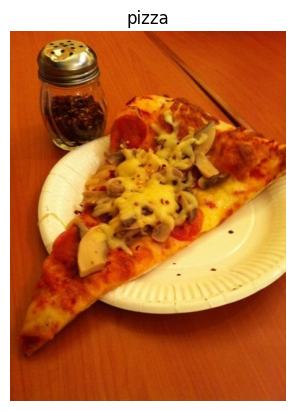

In [9]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[180,  61,   3],
        [183,  64,   6],
        [187,  67,   7],
        ...,
        [157,  38,   6],
        [157,  38,   6],
        [157,  38,   6]],

       [[185,  66,   8],
        [185,  66,   8],
        [187,  67,   7],
        ...,
        [155,  36,   4],
        [155,  36,   4],
        [156,  37,   5]],

       [[188,  69,  11],
        [187,  68,  10],
        [186,  66,   6],
        ...,
        [156,  36,   2],
        [157,  37,   3],
        [158,  38,   4]],

       ...,

       [[147,  48,   9],
        [145,  46,   7],
        [142,  43,   2],
        ...,
        [177,  71,  29],
        [178,  72,  30],
        [179,  73,  31]],

       [[149,  51,  12],
        [146,  48,   9],
        [143,  44,   3],
        ...,
        [177,  71,  29],
        [177,  71,  29],
        [176,  70,  28]],

       [[150,  52,  13],
        [146,  48,   9],
        [142,  43,   2],
        ...,
        [176,  70,  2

# An end-to-end example

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3),
                           ),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')

])


model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - accuracy: 0.5111 - loss: 0.7042 - val_accuracy: 0.7540 - val_loss: 0.5848
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7744 - loss: 0.5432 - val_accuracy: 0.8360 - val_loss: 0.3991
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.8321 - loss: 0.3846 - val_accuracy: 0.8600 - val_loss: 0.3460
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.8507 - loss: 0.2975 - val_accuracy: 0.8540 - val_loss: 0.3111
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8818 - loss: 0.2910 - val_accuracy: 0.9020 - val_loss: 0.2759


In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 221, 221, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,015 (359.44 KB)

 Trainable params: 30,671 (119.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,344 (239.63 KB)

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5218 - loss: 3.1590 - val_accuracy: 0.7400 - val_loss: 0.8022
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.7206 - loss: 1.2321 - val_accuracy: 0.6880 - val_loss: 0.8750
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6609 - loss: 0.9567 - val_accuracy: 0.5100 - val_loss: 0.6793
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4934 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [14]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.5142 - loss: 6.6255 - val_accuracy: 0.5780 - val_loss: 2.2846
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.6714 - loss: 1.6927 - val_accuracy: 0.6240 - val_loss: 1.7653
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.7093 - loss: 1.0482 - val_accuracy: 0.5960 - val_loss: 1.4801
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.6813 - loss: 1.2406 - val_accuracy: 0.7800 - val_loss: 0.8066
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.7835 - loss: 0.6337 - val_accuracy: 0.6980 - val_loss: 0.9507


In [16]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

# Binary Classification

## 1. Become one with the data (Visualize)

Image shape: (384, 512, 3)
Image shape: (383, 512, 3)


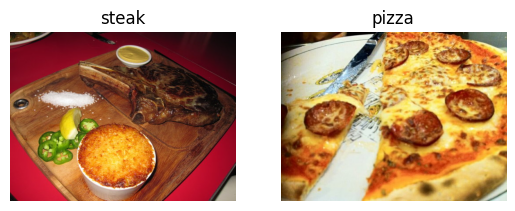

In [17]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

## 2. Preprocess the data

In [18]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

### Old Preprocessing method

In [19]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32,
#                                                image_size=(224, 224),
#                                                seed=42)

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              batch_size=32,
#                                              image_size=(224, 224),
#                                              seed=42)

### Modern preprocessing method

In [20]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


## 3. Create CNN model

In [22]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/225),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           strides=(1, 1),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5764 - loss: 8.0504 - val_accuracy: 0.7480 - val_loss: 0.5141
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.7850 - loss: 0.4795 - val_accuracy: 0.7600 - val_loss: 0.4576
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.8316 - loss: 0.3760 - val_accuracy: 0.7820 - val_loss: 0.4927
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - accuracy: 0.9264 - loss: 0.2075 - val_accuracy: 0.7800 - val_loss: 0.7186
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.9719 - loss: 0.1125 - val_accuracy: 0.7500 - val_loss: 0.8776
